In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

HI!

Base Rate (BIS)

In [2]:
US_base = pd.read_csv('DFF.csv')
US_base = US_base.rename(columns={'DFF':'US_base'})

In [3]:
KOR_base = pd.read_csv('kor_base.txt', header=None,sep=' ')
KOR_base = KOR_base.rename(columns={0:'YYYY', 1:'MMM', 2:'KOR_base'})

In [4]:
JPN_base = pd.read_csv('JPN_base.csv')
JPN_base = JPN_base.rename(columns={'The Basic Discount Rate and Basic Loan Rate' : 'JPN_base'})

In [5]:
HK_base = pd.read_csv('HK_base.txt', header=None,sep=' ')
HK_base = HK_base.rename(columns={0:'YYYY', 1:'MMM', 2:'HK_base'})

SPOT

In [6]:
USD_KRW_SPOT = pd.read_csv('USD_KRW_SPOT.txt', header=[1], sep=" ")
USD_KRW_SPOT = USD_KRW_SPOT[USD_KRW_SPOT['YYYY']>=2010]
USD_KRW_SPOT = USD_KRW_SPOT.rename(columns={'KRW/USD' : 'USD/KRW_SPOT'})

In [7]:
JPY_KRW_SPOT = pd.read_csv('JPY_KRW_SPOT.txt', header=[1], sep=" ")
JPY_KRW_SPOT = JPY_KRW_SPOT.rename(columns={'KRW/JPY' : 'JPY/KRW_SPOT'})

In [8]:
HKD_KRW_SPOT = pd.read_csv('HKD_KRW_SPOT.txt', header=[1], sep=" ")
HKD_KRW_SPOT = HKD_KRW_SPOT.rename(columns={'KRW/HKD' : 'HKD/KRW_SPOT'})

FWD

In [9]:
USD_KRW_FWD = pd.read_csv('USD_KRW_FWD.txt', header=None, sep='\t')
r_idx = [i for i in range(USD_KRW_FWD.shape[0]-1, -1, -1)]
USD_KRW_FWD = pd.DataFrame(USD_KRW_FWD, index = r_idx)
USD_KRW_FWD = USD_KRW_FWD.rename(columns={0:'MMM', 1:'YYYY', 2:'High', 3:'Low', 4:'Open', 5:'Close', 6:'% Chnage'})
USD_KRW_FWD['High'] = USD_KRW_FWD['High'].str.replace(',','').astype(float)
USD_KRW_FWD['Low'] = USD_KRW_FWD['Low'].str.replace(',','').astype(float)
USD_KRW_FWD['USD/KRW_FWD'] = (USD_KRW_FWD['High'] + USD_KRW_FWD['Low']) / 2

In [10]:
JPY_KRW_FWD = pd.read_csv('JPY_KRW_FWD.txt', header=None, sep='\t')
r_idx = [i for i in range(JPY_KRW_FWD.shape[0]-1, -1, -1)]
JPY_KRW_FWD = pd.DataFrame(JPY_KRW_FWD, index = r_idx)
JPY_KRW_FWD = JPY_KRW_FWD.rename(columns={0:'MMM', 1:'YYYY', 2:'High', 3:'Low', 4:'Open', 5:'Close', 6:'% Chnage'})
#JPY_KRW_FWD['High'] = JPY_KRW_FWD['High'].str.replace(',','').astype(float)
#JPY_KRW_FWD['Low'] = JPY_KRW_FWD['Low'].str.replace(',','').astype(float)
JPY_KRW_FWD['JPY/KRW_FWD'] = (JPY_KRW_FWD['High'] + JPY_KRW_FWD['Low']) / 2

In [11]:
HKD_KRW_FWD = pd.read_csv('HKD_KRW_FWD.txt', header=None, sep="\t")
r_idx = [i for i in range(HKD_KRW_FWD.shape[0]-1, -1, -1)]
HKD_KRW_FWD = pd.DataFrame(HKD_KRW_FWD, index = r_idx)
HKD_KRW_FWD = HKD_KRW_FWD.rename(columns={0:'Date', 1:'High', 2:'Low', 3:'Open', 4:'Close', 5:'% Chnage'})
HKD_KRW_FWD['HKD/KRW_FWD'] = (HKD_KRW_FWD['High'] + HKD_KRW_FWD['Low']) / 2

In [12]:
date = pd.read_csv('date.txt', header=None)
date = date.rename(columns={0:'Date'})

my_rate

In [13]:
my_rate = pd.concat([
    date['Date'], 
    US_base['US_base'], KOR_base['KOR_base'], JPN_base['JPN_base'], HK_base['HK_base'],
    USD_KRW_SPOT['USD/KRW_SPOT'], USD_KRW_FWD['USD/KRW_FWD'],
    JPY_KRW_SPOT['JPY/KRW_SPOT'], JPY_KRW_FWD['JPY/KRW_FWD'],
    HKD_KRW_SPOT['HKD/KRW_SPOT'], HKD_KRW_FWD['HKD/KRW_FWD']
    ], axis=1)

In [14]:
my_rate['Date'] = pd.to_datetime(my_rate['Date'])
selected_dates = my_rate['Date'][my_rate['Date'].dt.month == 1]  # 매년 1
xtick_labels = [date.strftime('%Y-%m') for date in selected_dates]

$$
i = i^{*} + {(F-E)}/{E}
$$

In [15]:
my_rate['Fitted KOR interest rate (US)'] = my_rate['US_base'] + (my_rate['USD/KRW_FWD'] - my_rate['USD/KRW_SPOT']) / my_rate['USD/KRW_SPOT']
my_rate['Fitted KOR interest rate (JPN)'] = my_rate['JPN_base'] + (my_rate['JPY/KRW_FWD'] - my_rate['JPY/KRW_SPOT']) / my_rate['JPY/KRW_SPOT']
my_rate['Fitted KOR interest rate (HK)'] = my_rate['HK_base'] + (my_rate['HKD/KRW_FWD'] - my_rate['HKD/KRW_SPOT']) / my_rate['HKD/KRW_SPOT']

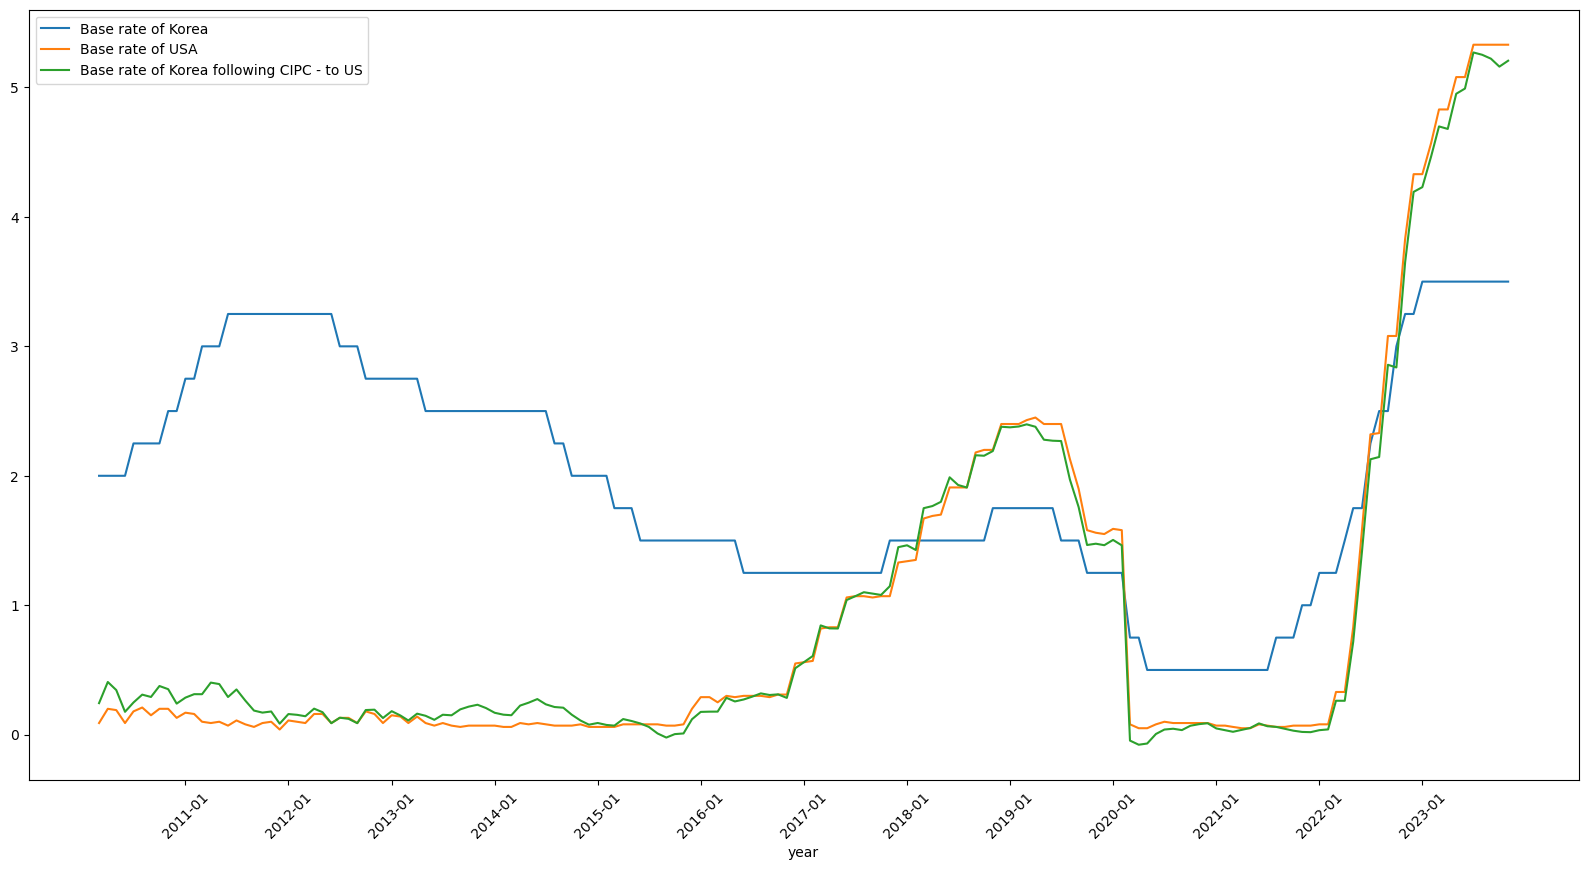

In [20]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['US_base'], label = 'Base rate of USA')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (US)'], label = 'Base rate of Korea following CIPC - to US')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.show()  

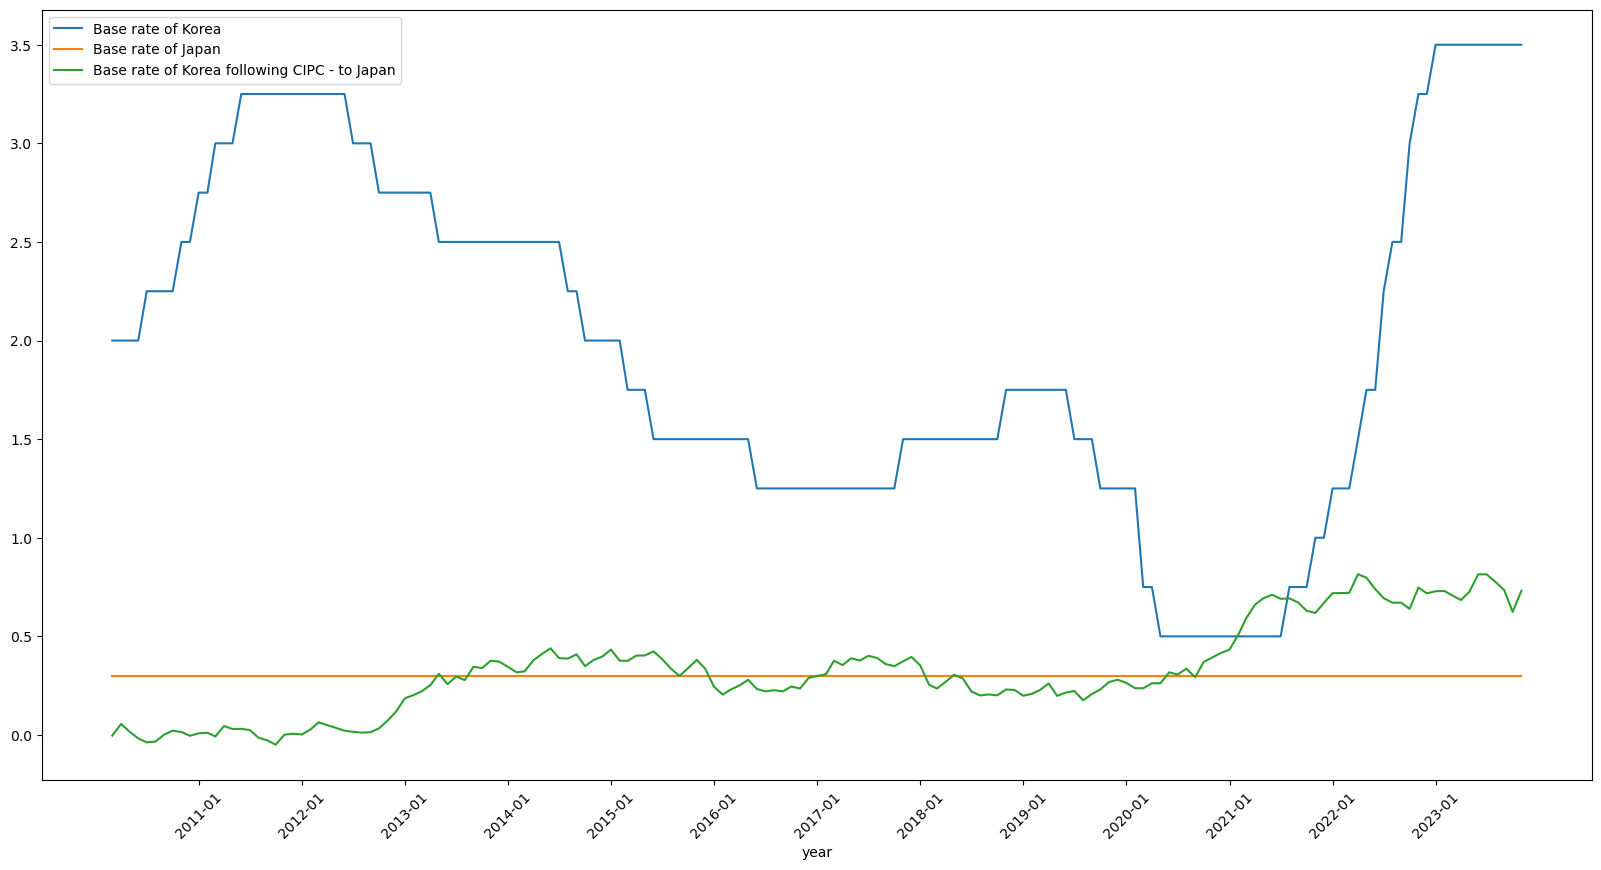

In [22]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['JPN_base'], label = 'Base rate of Japan')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (JPN)'], label = 'Base rate of Korea following CIPC - to Japan')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.show()  

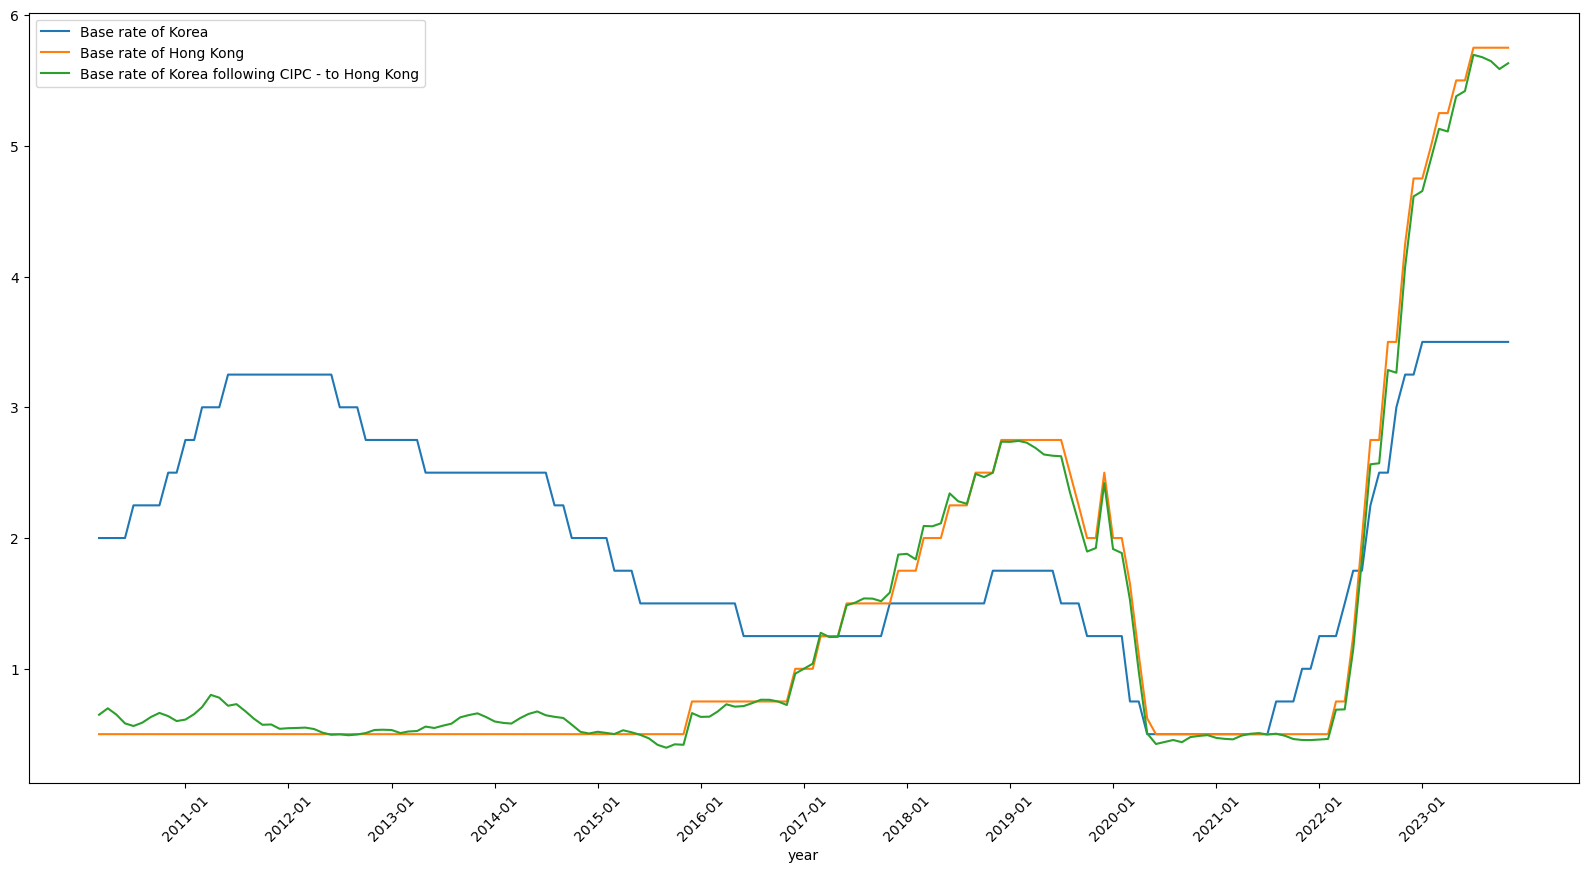

In [23]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['KOR_base'], label = 'Base rate of Korea')
plt.plot(my_rate['Date'], my_rate['HK_base'], label = 'Base rate of Hong Kong')
plt.plot(my_rate['Date'], my_rate['Fitted KOR interest rate (HK)'], label = 'Base rate of Korea following CIPC - to Hong Kong')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.show()  

What we can interpret is..

In [35]:
my_rate['return differential : KRW - USD'] = - my_rate['US_base'] + my_rate['KOR_base']
my_rate['return differential : KRW - JPY'] = - my_rate['JPN_base'] + my_rate['KOR_base']
my_rate['return differential : KRW - HKD'] = - my_rate['HK_base'] + my_rate['KOR_base']

my_rate['Exchange discount : KRW - USD'] = (my_rate['USD/KRW_FWD'] - my_rate['USD/KRW_SPOT']) / my_rate['USD/KRW_SPOT']
my_rate['Exchange discount : KRW - JPY'] = (my_rate['JPY/KRW_FWD'] - my_rate['JPY/KRW_SPOT']) / my_rate['JPY/KRW_SPOT']
my_rate['Exchange discount : KRW - HKD'] = (my_rate['HKD/KRW_FWD'] - my_rate['HKD/KRW_SPOT']) / my_rate['HKD/KRW_SPOT']


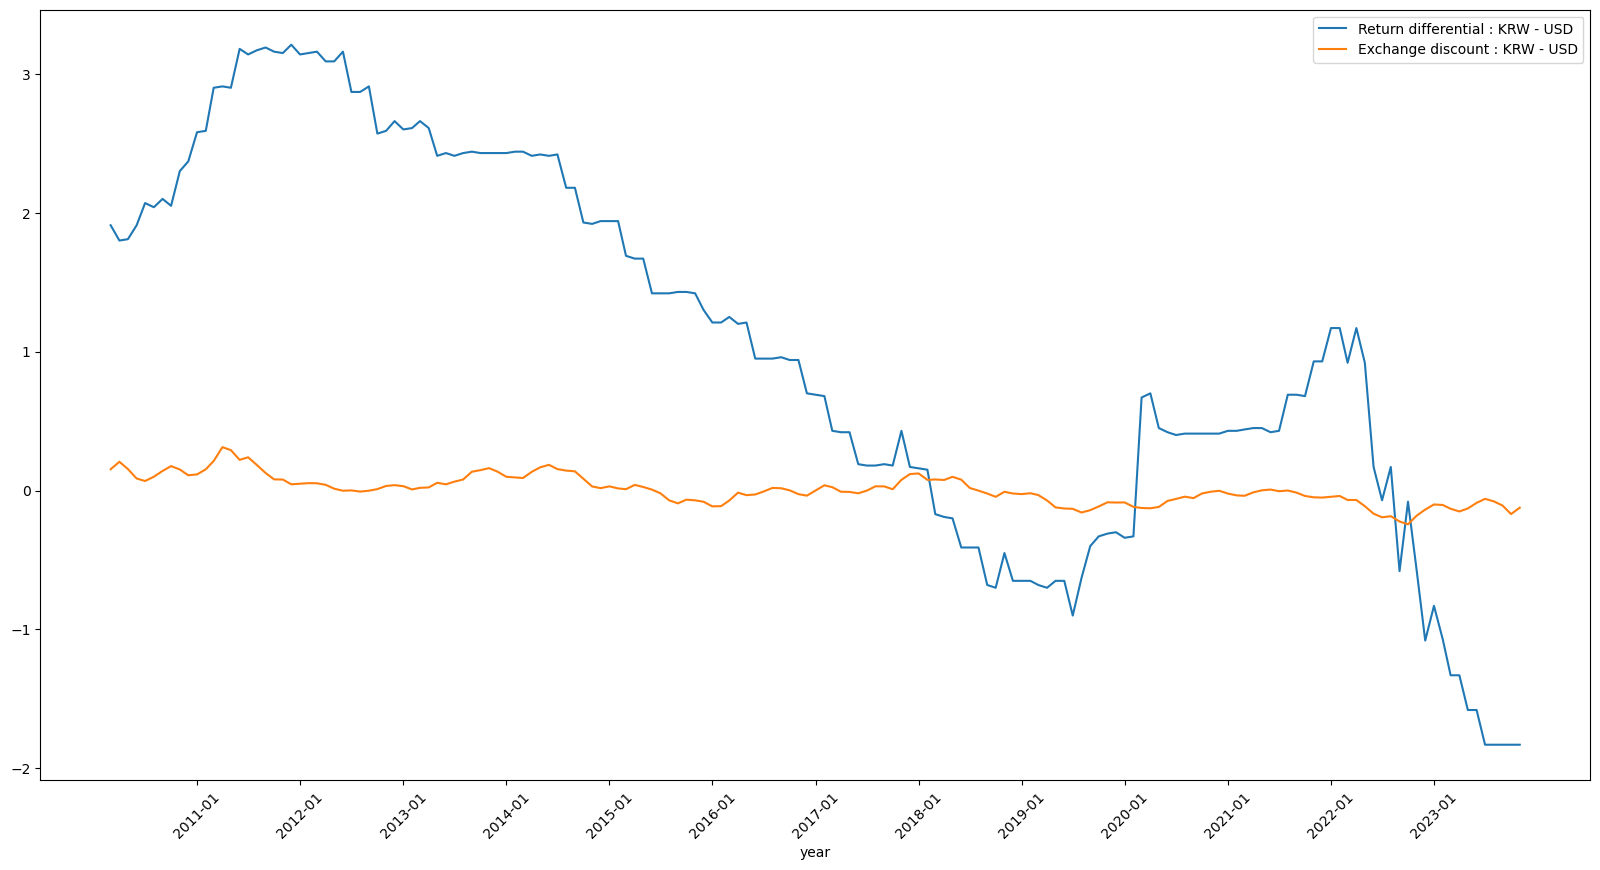

In [36]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential : KRW - USD'], label = 'Return differential : KRW - USD')
plt.plot(my_rate['Date'], my_rate['Exchange discount : KRW - USD'], label = 'Exchange discount : KRW - USD')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.show()  

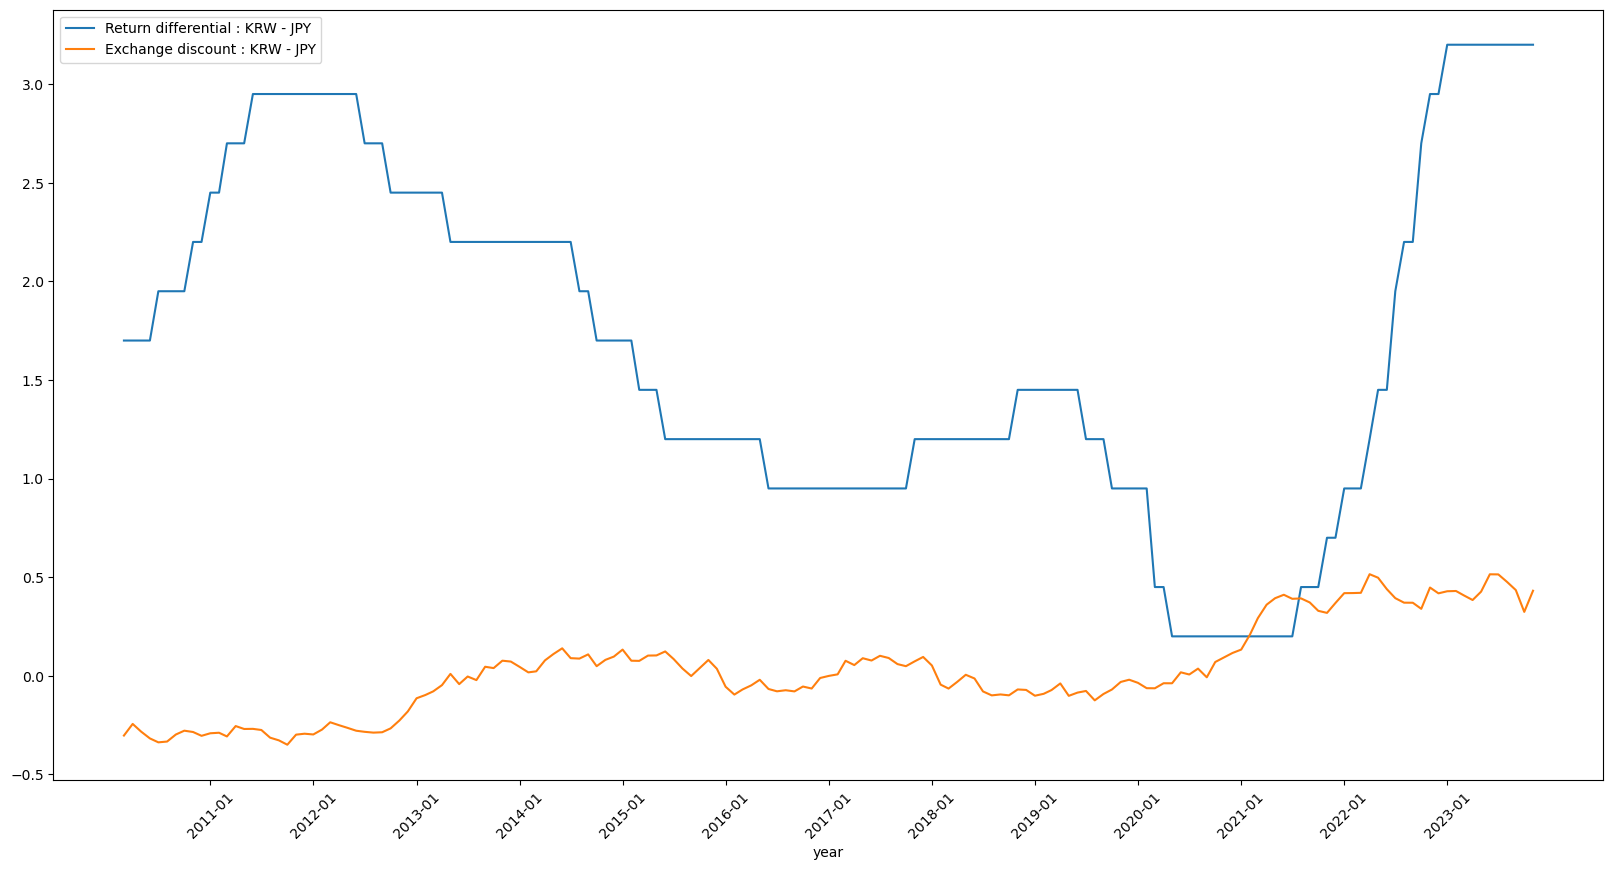

In [37]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential : KRW - JPY'], label = 'Return differential : KRW - JPY')
plt.plot(my_rate['Date'], my_rate['Exchange discount : KRW - JPY'], label = 'Exchange discount : KRW - JPY')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.show()  

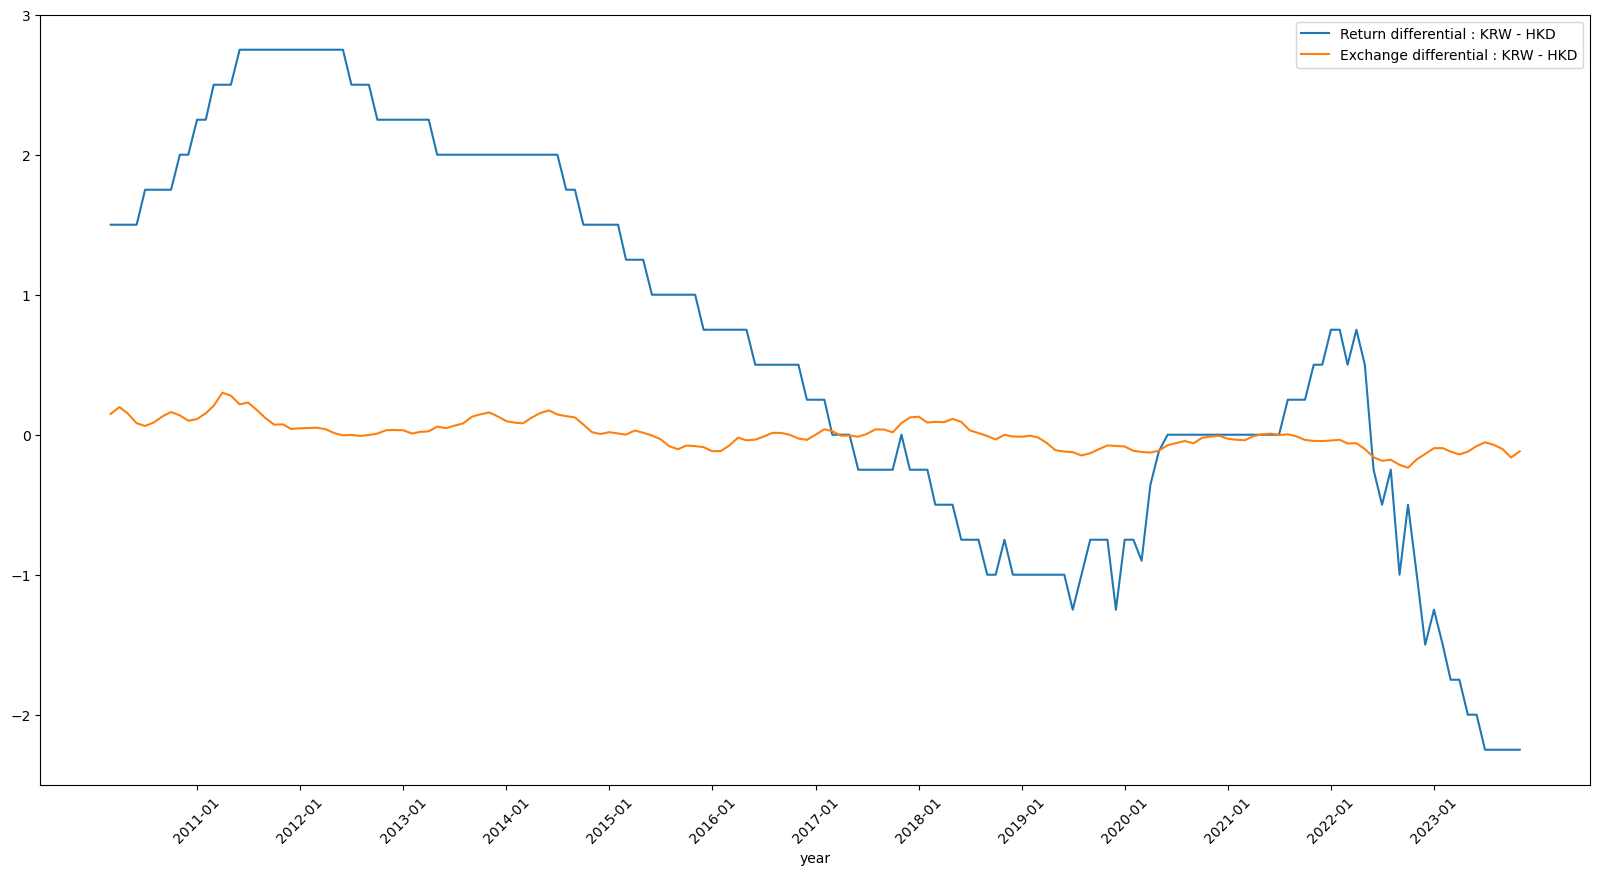

In [38]:
plt.figure(figsize=(20,10))

plt.plot(my_rate['Date'], my_rate['return differential : KRW - HKD'], label = 'Return differential : KRW - HKD')
plt.plot(my_rate['Date'], my_rate['Exchange discount : KRW - HKD'], label = 'Exchange differential : KRW - HKD')

plt.xticks(ticks=selected_dates, labels=xtick_labels, rotation=45)

plt.legend()
plt.xlabel('year')
plt.show()  